# Tarea 2

#### Eva Yazmín Santiago Santos
#### César Daniel Rodríguez Rosenblueth

Como siempre, documenten **todo** lo que hacen en el notebook

Se recomienda que *colaboren* (equipos de máximo dos personas) en la tarea.

## 1. Histogramas

Usando la función `randn`, generen $N$ valores tipo `Float64` al azar ($N\sim 10000$, o mayor, es razonable). Construyan la función `histograma`, que regresa un vector de tamaño $n_{hist}$ (que es un argumento de la función) y que contiene el histograma de frecuencias *sin normalizar*. Esto es, la primer componente del vector corresponde al número de valores generados al azar que caen en el intervalo (llamado *bin* en inglés) $[x_0, x_1)$, los de la segunda componente caen en el intervalo $[x_1, x_2)$, etc, hasta $[x_{n_{hist}-1}, x{n_{hist}})$, donde el tamaño de los intervalos es el mismo y corresponde a $\Delta x = (\textrm{sup}(x)-\textrm{inf}(x))/n_{hist}$. (No escatimen en estética.)

Dibujen el histograma a partir de sus datos.

PyPlot (matplotlib) de hecho tiene [una función]() útil para dibujar histogramas a partir de los datos directamente. Utilizando esa función, muestren el histograma de sus datos. Debería ser muy parecida a la que ya obtuvieron antes.

NOTA: Hay esencialmente dos formas de hacerlo, que se distinguen por el número de veces que uno lee los datos. Traten de hacer su implementación usando *una* lectura de los datos. (Si no pueden, llevarán sobre sus hombros esa carga toda su vida.)

In [1]:
using PyPlot

Agregamos el paquete Vega porque una de nuestras funciones, histograma1 la utiliza para graficar barras. Intentamos graficar las barras con pyplot originalmente pero tuvimos problemas con su ancho y se sobreponían.

In [2]:
Pkg.add("Vega")
using Vega

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of Vega
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [66]:
M=10000
r = randn(M)

function histograma1(rdm, nh)
    max = maximum(rdm)
    min = minimum(rdm)
    dx = (max - min)/nh
    nhist=[]
    hist=zeros(nh)
    n=0
    for
        k=1:nh
        delx = min+k*dx
        push!(nhist,delx)
    end
    for j in rdm 
        for i= 1:nh
            if i<nh
                if j>=(min+dx*(i-1))
                    if j<(min+dx*i)
                        hist[i]=hist[i]+1
                    end  
                end
            end
            if i==nh
                if j>=(min+dx*(i-1))
                    hist[i]=hist[i]+1
                end
            end
        end
    end
    barplot(x=nhist,y=hist)    
end 




histograma1 (generic function with 1 method)

In [67]:
histograma1(r,100)

Comparamos con la función de histrograma integrada en PyPlot, podemos apreciar son la misma aunque utilizan escalas distintas. Adicionalmente hay un problema con nuestra función ya que se pierde la escala del eje x. 

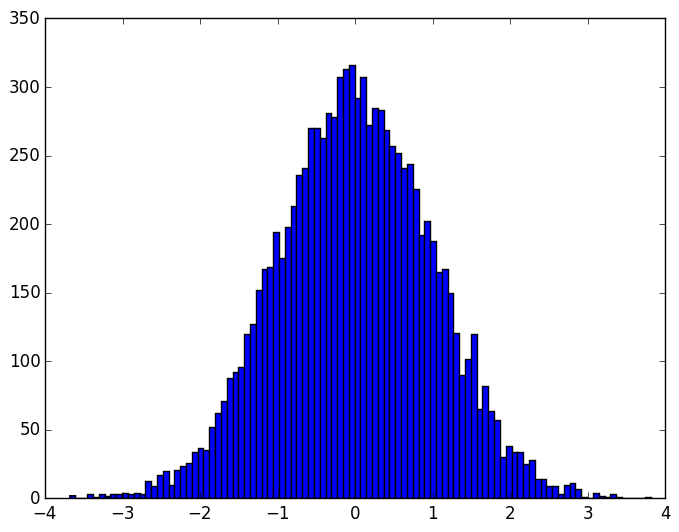

([2.0,0.0,0.0,3.0,1.0,3.0,2.0,3.0,3.0,4.0  …  4.0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0],[-3.68,-3.60501,-3.53001,-3.45501,-3.38001,-3.30502,-3.23002,-3.15502,-3.08002,-3.00503  …  3.14477,3.21977,3.29477,3.36977,3.44476,3.51976,3.59476,3.66976,3.74476,3.81975],Any[PyObject <matplotlib.patches.Rectangle object at 0x7f0a84c54d90>,PyObject <matplotlib.patches.Rectangle object at 0x7f0a84c63450>,PyObject <matplotlib.patches.Rectangle object at 0x7f0a84c63ad0>,PyObject <matplotlib.patches.Rectangle object at 0x7f0a84c63fd0>,PyObject <matplotlib.patches.Rectangle object at 0x7f0a84bf5810>,PyObject <matplotlib.patches.Rectangle object at 0x7f0a84bf5e90>,PyObject <matplotlib.patches.Rectangle object at 0x7f0a84c02550>,PyObject <matplotlib.patches.Rectangle object at 0x7f0a84c02bd0>,PyObject <matplotlib.patches.Rectangle object at 0x7f0a84c0f290>,PyObject <matplotlib.patches.Rectangle object at 0x7f0a84c0f910>  …  PyObject <matplotlib.patches.Rectangle object at 0x7f0a84ab2390>,PyObject <matplot

In [5]:
plt[:hist](r, 100)

En seguida presentamos nuestra segunda función histograma, a diferencia de la anterior esta grafica un punto en la mitad de cada bin.

In [6]:
N=10000
v=randn(N);

In [7]:
function histograma2(data,n)
    nhist = zeros(n) #Creamos el arreglo que regresará la función histograma
    supremo = maximum(data)
    infimo = minimum(data)
    Δx = (supremo - infimo)/n #Definimos el tamañano del intervalo
    nbins = (infimo+Δx/2):Δx:(supremo-Δx/2) #
    for h in data
        for i in 1:n
            #Separamos en dos casos, el segundo caso es para el último intervalo es cerrado de ambos lados, y el resto
            #en el que son abiertos del lado derecho. Ya que si no puede llegar a saltarse un punto.
            if (i<n) && (h >= infimo+Δx*(i-1)) && (h < infimo+Δx*i)
                nhist[i]=nhist[i]+1
            end
            if (i==n) && (h>=infimo+Δx*(i-1))
                nhist[i]=nhist[i]+1
            end
        end
    end
    graf=plot(nbins,nhist,"r."), xlim(infimo,supremo)
end

histograma2 (generic function with 1 method)

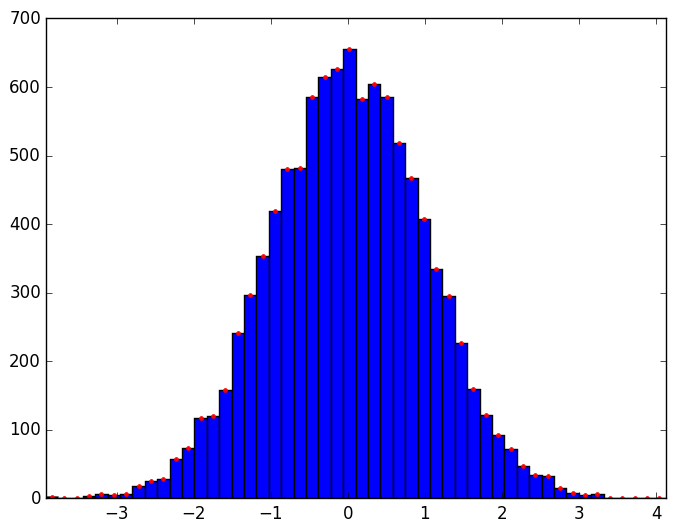

(Any[PyObject <matplotlib.lines.Line2D object at 0x7f0a848fbe10>],(-3.9219517596468156,4.119404173282345))

In [8]:
plt[:hist](v, 50)
ejemplo=histograma2(v,50)

Como se puede ver en la gráfica corresponden perfectamente nuestra función con la que tiene el paquete PyPlot. Con la diferencia que la nuestra grafica puntos en lugar de una barra.

## 2. Promedio y varianza

(a) Siguiendo con la generación de datos del ejercicio anterior, hagan una subrutina que calcule el promedio y la varianza de los datos generados anteriormente. Comparen su resultado con lo que se obtiene al utilizar `mean` y `var` (que son las funciones nativas de julia que hacen eso).
    
(b) Existe un [algoritmo recursivo](https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Online_algorithm), ampliamente desconocido, que permite calcular el promedio y la varianza con una sóla lectura de los datos. Impleméntenlo. La *misma* función debería de darles *ambos* valores.
    
(c) ¿Cuál de todos los algoritmos es el más rápido? Consideren esto para datos de distinta longitud, cubriendo varios órdenes de magnitud.


## a)

In [9]:
function promvar(data)
    p=0 #suma para calular la varianza
    n=length(data)
    promedio=sum(data)/n
    for h in data
        p=p+(h-promedio)^2
    end
    var=p/n
    return(promedio, var)
end
        

promvar (generic function with 1 method)

In [10]:
promvar(r)

(-0.004825469545077064,0.9870999245766104)

Comparamos con las funciones que ya tiene integradas Julia

In [11]:
(mean(r), var(r))

(-0.004825469545077064,0.9871986444410542)

In [12]:
promvar(r)[1]-mean(r)

0.0

El error entre nuestra función y la que está integrada en Julia es de 0 por lo que sospechamos están definidas de la misma manera. Hacemos un interludio para mencionar que cuando calculamos la suma explícitamente usando:

In [13]:
s = 0
for i in r
    s+=i
end
s/length(r)

-0.004825469545077066

Se obtiene un valor ligeramente distinto

Calculamos el error de la varianza

In [14]:
error1=abs(promvar(r)[2]-var(r))

9.871986444376368e-5

Calculamos el error porcentual

In [15]:
error1/var(r)*100

0.009999999999965384

Para estos datos el error en la varianza de nuestro cálculo con el de Julia es de tan solo 0.1% Nosotros creemos que esto se debe a que estamos calculando la varianza considerando que todos los datos tienen la misma probabilidad y Julia tiene implementada una corrección.

## b)

A continuación tomamos la función presente en el codigo que nos 'envió' el profesor para calcular el promedio y la varianza recursivamente.

In [16]:
function online_variance(rdm)
    n = 0
    mean = 0.0
    M2 = 0.0
     
for x in rdm
        n += 1
        delta = x - mean
        mean += delta/n
        M2 += delta*(x - mean)
    end
    if n < 2
        return (mean, NaN)
    else
    return (mean, M2 / (n - 1))
    end
end

online_variance (generic function with 1 method)

Después comparamos los valores obtenidos de esta función con respecto a las que ya incluye Julia y la que nosotros definimos.

In [17]:
online_variance(r)

(-0.0048254695450770735,0.9871986444410545)

Primero calculamos el del promedio

In [18]:
error2=abs(online_variance(r)[1]-promvar(r)[1])

9.540979117872439e-18

In [19]:
error2/abs(promvar(r)[1])*100

1.977212585997176e-13

Por el orden de magnitud podemos concluir que es desprecibale el error que presenta en el cálculo del promedio

In [20]:
error3=abs(online_variance(r)[2]-promvar(r)[2])

9.871986444409675e-5

In [22]:
error3/promvar(r)[2]*100

0.010001000100009119

El error de la varianza es más sustancial ya que es del orden de 1%.

## c)

Calculamos el tiempo que se tarda en ejecutar las distintas funciones Julia para los arreglos que se muestran a continuación. Las celdas con nuestra función promvar(x) y online_variance(x) son ejecutadas dos veces para que no tomemos el tiempo de compilación en la ejecución.

In [23]:
a=rand(100)
b=rand(10000)
c=rand(10000000);

In [64]:
@time mean(a)
@time mean(b)
@time mean(c)

0.4998830489193225

0.000003 seconds (5 allocations: 176 bytes)
  0.000009 seconds (5 allocations: 176 bytes)
  0.007064 seconds (5 allocations: 176 bytes)


In [63]:
@time promvar(a) 
@time promvar(b)
@time promvar(c)

  0.000013 seconds (206 allocations: 3.328 KB)
  0.000290 seconds (20.01 k allocations: 312.719 KB)
  

(0.4998830489193225,0.08335649472203044)

0.308126 seconds (20.00 M allocations: 305.176 MB, 9.98% gc time)


In [61]:
@time var(a),mean(a) #Ponemos las dos en un mismo time para que sume el tiempo
@time var(b),mean(b)
@time var(c),mean(c)

(0.08335650305767492,0.4998830489193225)

0.000022 seconds (10 allocations: 336 bytes)
  0.000080 seconds (10 allocations: 336 bytes)
  0.026138 seconds (10 allocations: 336 bytes)


In [65]:
@time online_variance(a)
@time online_variance(b)
@time online_variance(c)

(0.49988304891925084,0.08335650305766909)

0.000007 seconds (5 allocations: 192 bytes)
  0.000239 seconds (5 allocations: 192 bytes)
  0.084227 seconds (5 allocations: 192 bytes)


Si comparamos los valores de cada una con respecto a una misma variable (a,b,c) podemos ver que la más rapida para secuencias de datos pequeñas es online_variance(), para arreglos con 10000 datos la mejor es la que tiene integrada Julia y la peor es nuestra función promvar(), aunque todas tienen el mismo orden de magnitud. Finalmente para arreglos muy grandes las funciones integradas en Julia son cuatro veces más rapidas que la online_variance() y la nuestra es un orden de magnitud más lenta. 

## 3. Método de Simpson para integrar $f(x)$ en un intervalo

Implementen el método de Simpson para integrar una función arbitraria $f(x)$.

In [53]:
function simpson(f::Function,a::Real,b::Real,n::Int64)
    suma = 0.0
    Δx = (b-a)/n
    v = (a:Δx:b)
    c=length(v)-1
    for j=1:c
        int = (Δx/6)*(f(v[j])+4*f((v[j]+v[j+1])/2)+f(v[j+1]))
        suma = suma+int
    end
    return suma
end

simpson (generic function with 1 method)

In [60]:
simpson(x->5x^4,0,1,100)

1.0000000004166667